In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
data.shape

(20640, 10)

In [4]:
print(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [5]:
data["total_bedrooms"] = data["total_bedrooms"].replace(np.NaN, data["total_bedrooms"].mean())

In [6]:
print(data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [7]:
data.duplicated().sum()

0

<Axes: >

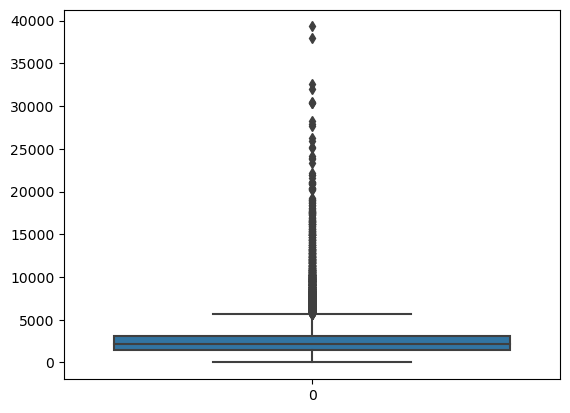

In [11]:
import seaborn as sns
sns.boxplot(data['total_rooms'])

In [12]:
s = data['total_rooms']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])
data = data.drop(outliers)

<Axes: >

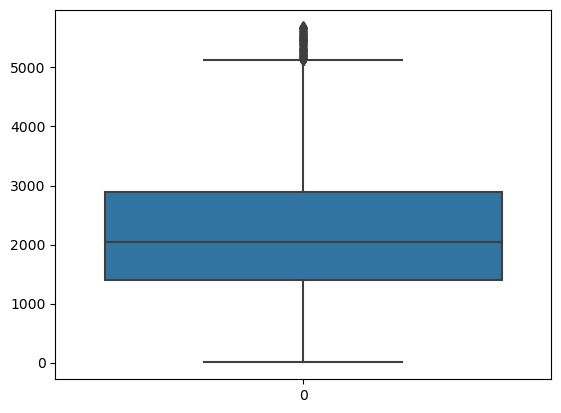

In [13]:
sns.boxplot(data['total_rooms'])

<Axes: >

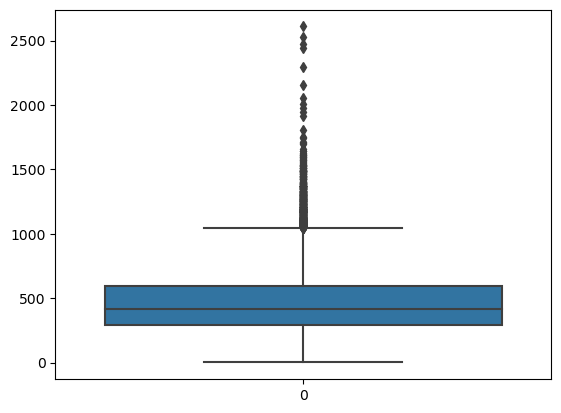

In [14]:
sns.boxplot(data['total_bedrooms'])

In [15]:
s = data['total_bedrooms']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])
data = data.drop(outliers)

<Axes: >

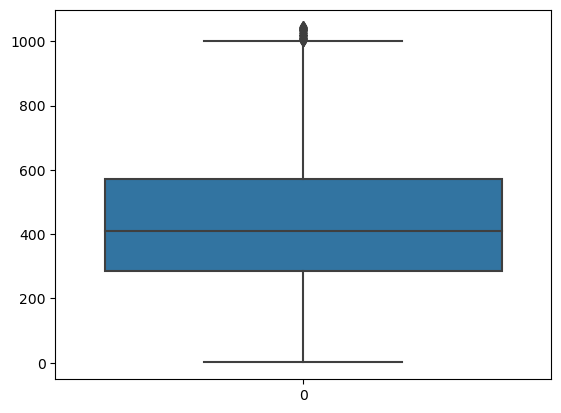

In [16]:
sns.boxplot(data['total_bedrooms'])

<Axes: >

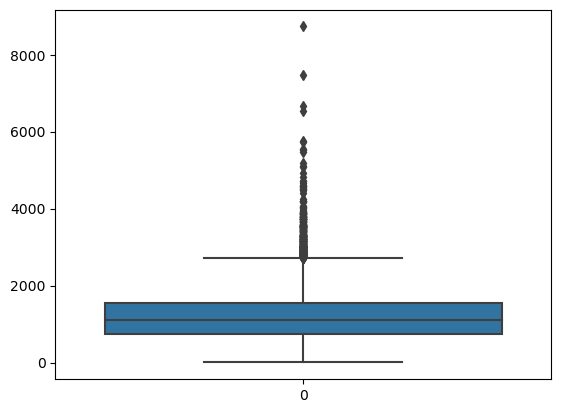

In [17]:
sns.boxplot(data['population'])

In [18]:
s = data['population']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])
data = data.drop(outliers)

<Axes: >

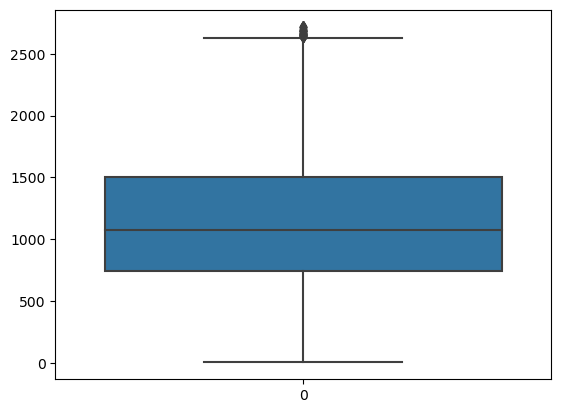

In [19]:
sns.boxplot(data['population'])

<Axes: >

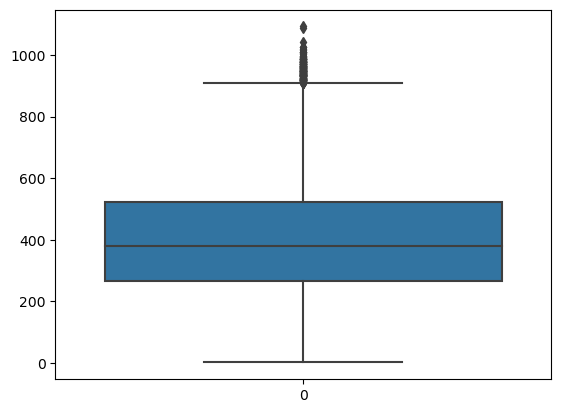

In [20]:
sns.boxplot(data['households'])

In [21]:
s = data['households']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])
data = data.drop(outliers)

<Axes: >

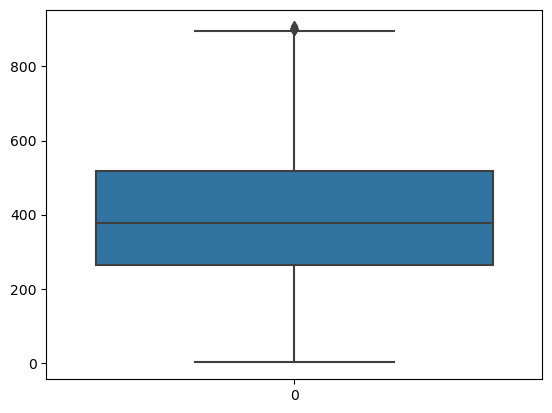

In [22]:
sns.boxplot(data['households'])

In [36]:
features = data.iloc[:, 0 : 9]
label = data.iloc[:, -1]

In [37]:
from sklearn.model_selection import train_test_split

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.25, random_state=0)
X_train.shape, X_test.shape

((12584, 9), (4195, 9))

In [53]:
from sklearn.preprocessing import StandardScaler

# Create and fit scaler
ss = StandardScaler()

# Don't cheat, fit only the train data
ss.fit(X_train)

ss_X_train = ss.transform(X_train)
ss_X_test = ss.transform(X_test)

ss_X_train[:], ss_X_test[:]

(array([[-0.43930179,  0.7289846 ,  0.44067767, ..., -0.30255647,
         -1.27682543, -1.39534121],
        [-1.40760428,  0.9493743 , -0.46164121, ...,  1.00212965,
         -1.85169446, -0.78919297],
        [-1.40261303,  0.88509397,  0.9328516 , ..., -2.04932633,
         -0.94157338,  0.31490217],
        ...,
        [ 1.0181432 , -0.84588347,  0.27661969, ...,  0.43604683,
         -0.94531409, -0.50544052],
        [ 0.97322195, -0.74946297,  0.52270665, ..., -0.7446402 ,
         -0.18030422, -0.47452586],
        [ 0.55395696, -0.00564773, -0.95381514, ...,  0.66247996,
         -1.38572941, -0.91174754]]),
 array([[-1.32774428,  0.96774011,  1.83517047, ...,  0.00474563,
         -1.6314868 , -0.88083287],
        [-1.31776178,  0.98610592,  1.83517047, ..., -1.06272483,
          2.49190159,  2.89517252],
        [-1.21793678,  0.76112477, -0.21555424, ...,  1.11534622,
          2.15227363,  1.77451595],
        ...,
        [ 1.2577232 , -1.38767482, -0.78975716, ..., -

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

ss_X_train = pca.fit_transform(X_train)
ss_X_test = pca.transform(X_test)

In [83]:
from sklearn import svm
classifier=svm.SVC()
classifier.fit(ss_X_train,  y_train)

SVC()

In [84]:
y_predict = classifier.predict(ss_X_test)
y_predict

array(['INLAND', '<1H OCEAN', '<1H OCEAN', ..., 'INLAND', 'INLAND',
       '<1H OCEAN'], dtype=object)

In [64]:
y_test

53         NEAR BAY
490        NEAR BAY
18163     <1H OCEAN
5727      <1H OCEAN
2773         INLAND
            ...    
11685     <1H OCEAN
19331     <1H OCEAN
14242    NEAR OCEAN
20030        INLAND
7913      <1H OCEAN
Name: ocean_proximity, Length: 4195, dtype: object

In [85]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6088200238379022
